<a href="https://colab.research.google.com/github/vicabc/vicabc/blob/main/markov_randomwalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Um cadeia de Markov cujo espaço de estados é dado por inteiros $i=\pm 1, \pm 2, \pm 3,...$  é uma caminha aleatória com matriz de probabilidade de transição em que vemos a diagonal principal rodeada apenas um passo acima ou um passo abaixo. 

Vamos considerar o caso em que há um número finito de estados $S= \{0,1,2,...,N\}$ sendo os estados 0 e N absorventes, isto é, $P_{00}=P_{NN}=1$. E não há possibilidade de iniciarmos com 0 e N ao mesmo tempo.

Problematizamos esta evolução através do problema da ruína de um apostador. Consideramos um apostador que a cada jogada ganha uma ficha com probabilidade de ganhar ou perder. Respectivamente $p$ e $(1-p)$. Dado que o apostador iniciou com  fichas $i$, qual é a probabilidade de ruína, ou seja, perder todas as fichas?

O matemático russo Andrei Markov mostrou que a probabilidade disto acontecer segue as condições: 

$P(X_{T}=0|X_{0}=i) = $ para $p \neq q $ temo s $1 - \frac{1-(\frac{q}{p})^{i} }{1- (\frac{q}{p})^{N}}$ e para $p=q$ vemos  $\frac{i}{N}$

Implementamos esta lógica matemática a seguir:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

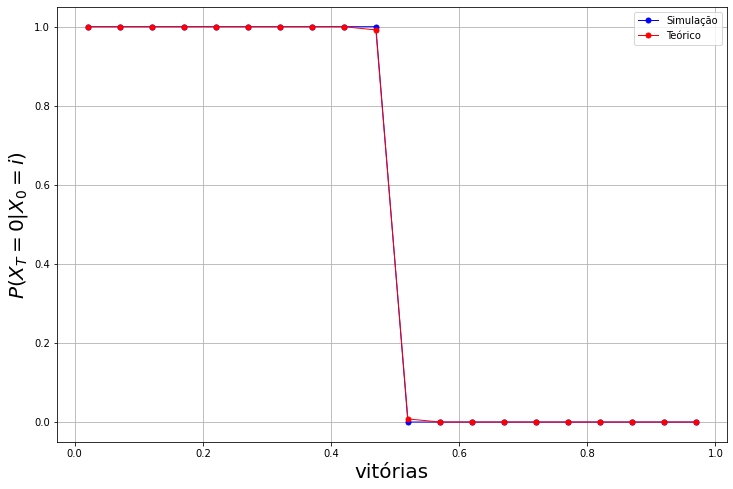

In [23]:
N = 100 #jogadas
Ns = 10 #simulações
i0 = 60 #fichas iniciais
listavits = np.arange(0.02,1,0.05) #um array variando em passos 0.05 entre 0.02 e 1 
listaderrota = []

#loop para simulação

for vit in listavits:
    nwins = 0 #quantas vitorias obteve
    for s in np.arange(0,Ns): #corremos dentro das simulações 
        i = i0
        while((i > 0) and (i < N)):
            if(np.random.uniform() < vit):
                i = i + 1
            else:
                i = i - 1
        if(i == N):
            nwins = nwins + 1
    listaderrota.append(1-nwins/Ns)
plt.figure(figsize=(12,8))

plt.plot(listavits, listaderrota, '-o', color='blue', linewidth=1, markersize=5, markerfacecolor='blue',label='Simulação')

#loop para probabilidade de ruína segundo Andrei Markov

listaderrota1 = []
i = i0
for vit in listavits:
    if(vit != 1/2): #caso seja == 1/2, sabemos que as probabilidades são igualmente prováveis
        win = (1-((1-vit)/vit)**i)/(1 - ((1-vit)/vit)**N)
    else:
        win = i/N
    listaderrota1.append(1 - win)
plt.plot(listavits, listaderrota1, '-o', color='red', linewidth=1, markersize=5,markerfacecolor='red', label='Teórico')

plt.xlabel("vitórias", fontsize=20)
plt.ylabel(r'$P(X_T = 0|X_0=i)$', fontsize=20)
plt.legend()
plt.grid(True)
plt.show(True)

Vemos que as simulações tendem a seguir exatamente a resposta matemática para essa distribuição probabilística.

Podemos analisar o comportamento das simulações através das análises feitas a seguir. Sugiro que sejam mudados o número de jogadas e as chances de vitórias para interpretação de como os dados estão se ajustando.

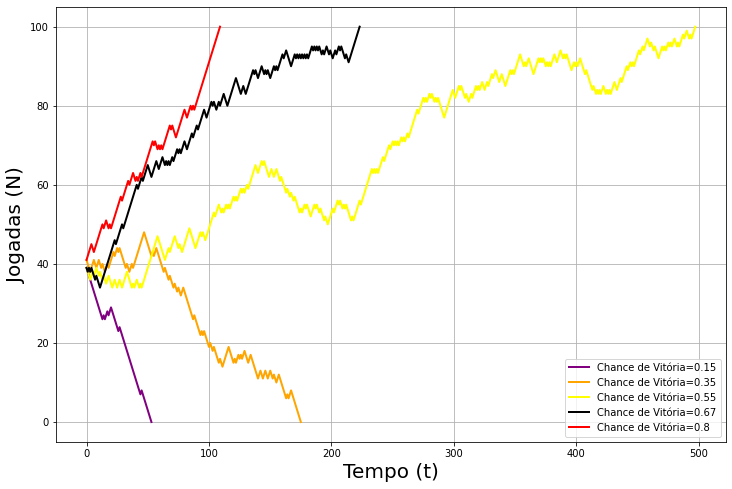

In [26]:
N =  100 #jogadas
chancevit = [0.15, 0.35,0.55, 0.67, 0.8]
colors = ['purple', 'orange', 'yellow', 'black','red']
plt.figure(figsize=(12,8))
cont = 0
for vit in chancevit:
    i = 40 #fichas iniciais 
    t = 0 #passos
    listat = []
    listav = []
    while((i > 0) and (i < N)):
        if(np.random.uniform() < vit):
            i = i + 1
        else:
            i = i - 1
        #print("t:",t," i:", i)
        listav.append(i)
        listat.append(t)
        t = t + 1
    plt.plot(listat, listav, linestyle='-', color=colors[cont], linewidth=2, label = 'Chance de Vitória='+str(vit))
    plt.xlabel("Tempo (t)", fontsize=20)
    plt.ylabel("Jogadas (N)", fontsize=20)
    cont = cont + 1
plt.legend()
plt.grid(True)
plt.show(True) 

Vemos que conforme a chance de vitória aumenta, menos passos (menos tempo) é gasto. E quando as chances de vitória e derrota são quase igualmente iguais, o tempo aumenta muito até ele tomar uma decisão. 

Concluímos que os resultados que tendem a parte superior do plot mais rapidamente, são os com maiores chances de vitórias. Enquanto os que tendem a parte inferior do plot, irão ser derrotados, perdendo todas as suas fichas.